# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
* The smartcab does not move within each training trial
* There two kinds of rewards: negative reward and positive reward
    * If the smartcab agent properly idled at a red light, the reward is positive.
    * If the smartcab agent idled at a green light with no oncoming traffic, the reward is negative


### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
* The three flags I would choose are: epsilon, alpha and (epsilon) tolerance
    * epsilon is the probability allowing the agent to perform a random action during training. If the epsilon is larger, the likelyhood that the agent explores unlearned behavior is large. 
    * tolerance is the minimum epsilon necessary to begin testing (if learning enabled). It is the threshold, when epsilon below which, the testing will start. The tolerance is one of the factors that determine how long the training will take. 
    * alpha is the ratio that what the propotion we should learn from current action.
* The Environment's act function is called when an agent performs an action.
* render_test() is the non-GUI render display of the simulation. It renders simulated trial data in the terminal prompt. While render() is the GUI render display of the simulation. It is a supplementary to showing information in the terminal.
* The next_waypoint() will check the east or west direction first according to the code.
    
    

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


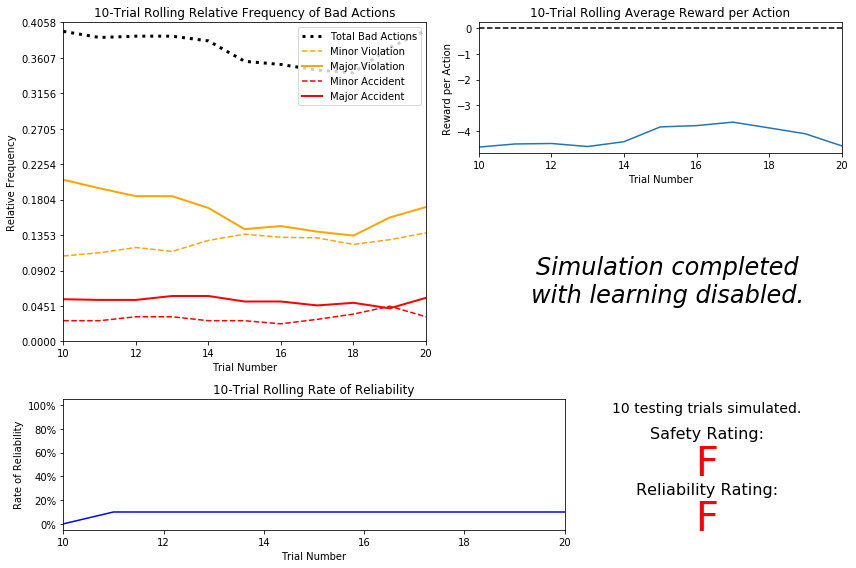

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
* The frequency that bad actions happen is roughly between 0.34 and 0.4. The frequency of accidents (both minor and major) those bad actions cause is about 0.07. 
* The rate of reliability is about 10% in the last 10 training trial. This rate is kind of makes senses although I think it is little bit high since the probability of an agent that can randomly reach the destination should be quite low and 10% is not low enough. 
* The average reward per action for each of the last 10 training trial is below -3 and most of them are below -4. These rewards are penalized properly considering the violation and accident rate.
* While the number of trials increases, outcome does not change significantly, which suggests that the agent does not learn from its past behaviors.
* This Smartcab cannot be considered safe and reliable simply because both safety rating and reliability rating are F for the 10 testing trials.
    * Worth pointing out that the reliability relates to the reliability of random actions. We can say that if we only take random actions, we'll get to the goal x% of the time reliably. It's like saying, if I flip a coin 100 times, I'll reliably get heads 50 times.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**
* I would choose 'waypoint' and all features of 'inputs'.
    * The features chosen for agent's state are: waypoing, light, left, right, oncoming. 
    * The waypoint will tell if the action is in the right direction to the destination and festures of 'input' tells if the action violates US right-of-way law and/or causes accident. 
* The 'deadline' is not an appropriate feature. This is because:
    * 'deadline' has a large amount of values since it is the number of actions remaining for the Smartcab to reach the destination before running out of time. Adding it to the feature set would significantly increase the search space.
    * Although 'deadline' would affect the efficiency, The alignment of waypoint and action contains the information on the efficiency. 
    * I would argue that "deadline" is like a giant clock, which ticks down. At best it may encourage the agent to rush near the end, but... since we are not using gamma, that would not work either. In short, deadline is entirely useless here.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
* I selected five features which are waypoint, light, left, right, oncomming. 
    * waypoint has three possible values, which are left, right, and forward
    * light has two possible values, which are red and green.
    * The last three features have four possible values, which are left, right, forward and None.
    * Therefore the the total number of states is 384.
* The agent can certainly learn a policy for each possible state. The default environment is a (8, 6) grid, which contains approximately 48 intersections, and has 100 dummy agents. When running a reasonable and large enough number of training trials, we can certainly learn at least one action with certain reward for each state. 
    * The math is correct here. Its an interesting question to ask "is it enough?" We should also consider if all state are probabilistically similar (they aren't) as this will greatly effect whether our agent can visit all the states (and attempt all the different actions)
* In question 7, I run 475 training trials and obtained a pretty excellent testing result, in which both rate of safety and rate of reliability is A+. 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

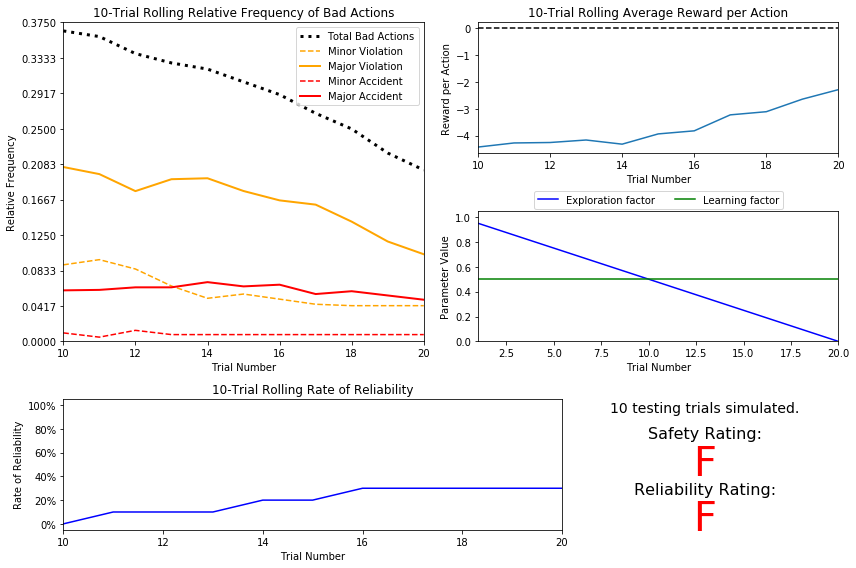

In [8]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
* During this learning process which includes 20 training trials, the bad actions decreases significantly, and both minor and major violations decreases while the training iteration goes on. However, the minor and major accidents are not improved while learning. 
* The rate of reliability and average reward per action increases while learning, which indicates that the agent learned from its past behaviors and achieved better actions. 
* The decaying function is correctly  the decaying function in the parameters panel.
* The safety and reliability rating do not change. They are still of grad F, which mean agent causes at least one major accident and fails to reach the destination on time for at least 60% of trips.
* To sum up, during this learning process, the agent has been learning from its past behaviors and achieved positive result. However, the outcome is not good enough probably because the training is not long enough or other factors. 

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

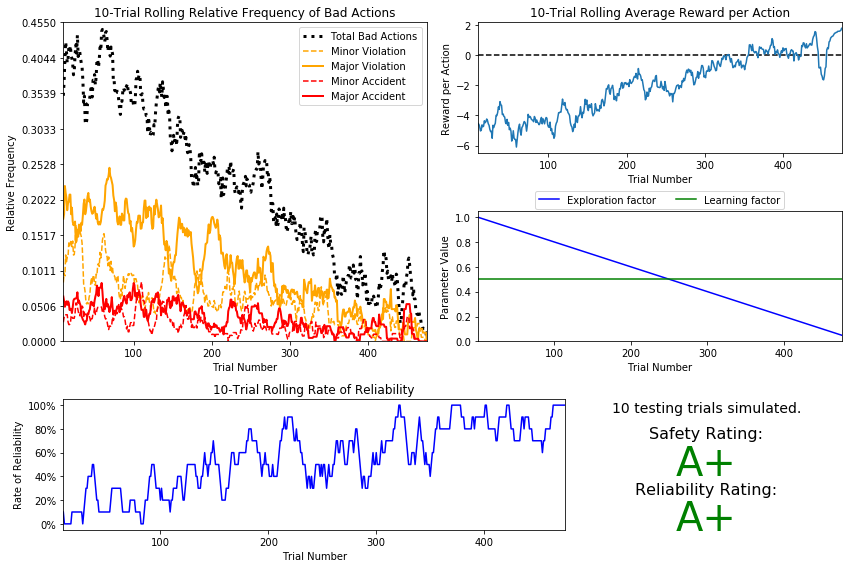

In [38]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
* The decaying function I used is epsilon_t+1 = epsilon_t - 0.002. The reason I choose this decaying function is simply because I want to increase the amount of training trials to a reasonable large number. Through trial and error, This decaying function yields a very excellent result.
* There are totally 475 training trials were performed before begining testing.
* I still used the default setting for epsilon-tolerance (i.e., 0.05) and alpha (i.e., 0.5) because simply they achieved a better result through trial and error. I tried to change the learning rate alpha and even used several decaying functions for alpha, but got no better result than the default setting. Probably I have not tried enough or the default setting is one of the best parameter setting. 
* Compared with the default Q-learner, this version improved dramatically in every perspective. As you can see in the visulization graphs, the bad actions, violations and accidents decrease significantly as the training goes on. The reward per action and rate of reliability increases as the training goes on. The testing trials show that we achieved optimal result, in which both safety rating and Reliability Rating are A+.
* I would say that Q-Learner results show that the driving agent successfully learned an appropriate policy and I am pretty satisfied with this result. 

### Notes about epsilon, epsilon tolerance and alpha

<br/>

**epsilon manages exploration vs exploitation**

The epsilon system is designed to manage the exploration vs exploitation system.

It's a constant battle in reinforcement learning to balance exploration with exploitation. That is trying new actions in order to find the optimal policy, while exploiting enough to be successful at the task.

In this simulation, it's actually possible to just generate enough trials in training that we can entirely learn the optimal policy. However more complicated scenarios may have much large state spaces in which the agent will never explore them all, so we need to more carefully balance exploration with exploitation. That's the goal of epsilon decay, and there is a lot of active research in this area.

**epsilon tolerance**

epsilon tolerance is a value that triggers the switch from building our agent up with exploration/exploitation aka training (updating our q-tables) to testing, which just evaluates the agent we have. Setting a lower tolerance will increase the amount of training trials (updating the q-table), before testing (evaluating our agent) begins. Setting tolerance high will make the agent decrease training times.

Keep in mind that if your epsilon decays very slowly, then you will have more training trials as well, and if your epsilon decays very quickly, you will have less training trials as well. So in some sense, the epsilon decay and epsilon tolerance both control the same "knob", which is "how long do we train for?"

**alpha**

Alpha is the learning rate. It's saying "how much should my agent 'remember' from this experience"
If we look into the equation, which generally looks like this
```
self.Q[state][action] = (1 - self.alpha) * self.Q[state][action] + self.alpha * reward
```
or
```
self.Q[state][action] = self.Q[state][action] + self.alpha * (reward - self.Q[state][action])
```
then we see that alpha intuitively updates the reward, the current q-value, and puts them together.

If we have a small alpha we basically only update a little bit of the reward and mostly keep what we already knew. if we have a large alpha, we update entirely based on the reward.

Our environment is <e>deterministic</e>:

given any state there is ALWAYS a best action to take

Given any state, the agent will always get the same exact reward for the same exact action. This deterministic property of reward assignment, makes alpha arbitrary (as long as it's <0). No matter how the rewards are updated (with large or small alpha's), the agent will get the largest value for "good" actions and smaller values for bad actions. So it should learn the optimal policy either way.

Keep in mind, this is an edge case of q-learning - it applies because our Q-learning has Gamma = 0, there are no future rewards to consider (and balance against the alpha parameter) and also because our environment is deterministic in how rewards are assigned.


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

* For a optimal policy, the action taken should be aligned with the next waypoint without violation and accident such that both the safety and efficiency of the trained agent can be satisfied. The following shows rules for achieving optimal policy:

    * if waypoint == right  
        * if light != green
            * if left != forward --> action=right 
            * otherwise --> action=None
        * if light == green --> action=right

    * if waypoint == left    
        * if light != green --> action=None
        * if light == green
            * if oncoming != forward and oncoming != right --> action=left

    * if waypoint == forward   
        * if light != green --> action=None
        * if light == green --> action=forward
        
* After investigating the 'sim_improved-learning.txt', I found that most of the policies is correct for the given state, only few of the policies are not quite right.
* The following policies are optimal. The explaination for each policy for why it is optimal is provided. Also, I listed all features used to define the state and the definition for these features.
    * Features for defining state: 'waypoint', 'light', 'left', 'right' and 'oncoming'
        * 'waypoint', which is the direction the Smartcab should drive leading to the destination, relative to the Smartcab's heading.
        * 'light', the color of the light.
        * 'left', the intended direction of travel for a vehicle to the Smartcab's left. Returns None if no vehicle is present.
        * 'right', the intended direction of travel for a vehicle to the Smartcab's right. Returns None if no vehicle is present.
        * 'oncoming', the intended direction of travel for a vehicle across the intersection from the Smartcab. Returns None if no vehicle is present.

```
('left', 'green', 'left', None, None)
 -- forward : 7.72
 -- None : -91.07
 -- right : 11.08
 -- left : 92.50
 ```
This policy is optimal because:<br/>
the waypoint is left and light is green and the direction of oncoming agent is neither forward nor right (Actually there is no oncoming agent), <br/>
Therefore the optimal action should be left, which is aliged with action with max Q value.
 
 ```
 ('right', 'red', 'left', None, 'right')
 -- forward : -25.14
 -- None : 0.00
 -- right : 3.46
 -- left : -19.15
 ```
 
This policy is optimal because:<br/>
the waypoint is right and light is red and the direction of left agent is not forward, <br/>
Therefore the optimal action should be right, which is aliged with action with max Q value.
 
 ```
 ('forward', 'red', 'forward', 'forward', 'left')
 -- forward : 0.00
 -- None : 2.79
 -- right : 0.00
 -- left : -40.44
```
This policy is optimal because:<br/>
the waypoint is forward and light is red, <br/>
Therefore the optimal action should be None, which is aliged with action with max Q value.

```
('forward', 'green', 'forward', 'forward', None)
 -- forward : 12.99
 -- None : -9.95
 -- right : 0.24
 -- left : 0.00
 ```
This policy is optimal because:<br/>
the waypoint is forward and light is green, <br/>
Therefore the optimal action should be forward, which is aliged with action with max Q value.
 
* The following policies are not optimal policies:
 
```
 ('right', 'green', 'forward', 'forward', 'left')
 -- forward : 1.29
 -- None : -2.27
 -- right : 0.00
 -- left : -9.57
```
 In this policy, the waypoing is right and the light is green. Therefore, the optimal action should be right. However the action with max Q value is forward, which is not aligned with optimal action.
 
 In this policy, the Q value for the optimal action is 0.00, which indicates that the agent never turned right before given the state and thus the turn-right action never be rewarded. 
```
 ('forward', 'green', 'right', 'left', 'forward')
 -- forward : 0.00
 -- None : 0.00
 -- right : 0.78
 -- left : 0.00
```
  In this policy, the waypoing is forward and the light is green. Therefore, the optimal action should be forward. However the action with max Q value is right, which is not aligned with optimal action.
  
  In this policy, the Q value for the optimal action is 0.00, which indicates that the agent never took forward before given the state and thus the forward action never be rewarded. 

### Notes

So essentially the optimal policy is "follow the waypoints, don't break traffic rules". We see that a good agent generally learns this, although there may be exceptions. Often these exceptions are due to the fact that the agent simply has not explored enough. Even with thousands of trials due to the random nature of state distribution, the agent may not have explored every state successfully.

In your sub-optimal policy you may see that the correct action was never explored. This is why it's important to run enough trials in order to let the agent explore all the different actions. Longer exploration would remedy both situations where a sub-optimal policy is learned.

Other times the agent learns a suboptimal policy because it first explores an action which is sub-optimal, but does yield positive rewards, and then repeatedly exploits that action. Later it may randomly explore the optimal policy, but at that point the suboptimal policy will have a higher value in the q-table.
For example, this might be "going forward at a green light" instead of following the waypoint at a green light. We will get some reward for simply moving on green, regardless of the waypoint, but it's not optimal. However it will be regularly exploited until exploration occurs again. During the exploitation period, it will build up a significant lead on the optimal policy.

However we also see that our agent has learned the policies well enough, to meet specifications (A ratings) for this project. This shows that while our agent may not learn the entire optimal policy, it might learn enough to be adequate for a given job. Thus setting up the desired performance before beginning a RL experiment is quite important.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
* I think one reason the future rewards does not work is because the environment is deterministic. When the agent takes one action, it will end up in another state deterministically. When the future is deterministic, the rewards of future would be added to the overall Q values deterministically at every iteration. However, If the future is probabilistically, we should consider all possibility and take reward for every probability into account (As the Q-value function shown bellow).  

![alt text](images/Q-value_iteration.png)

* Considering that Gamma requires rewards to back propagate from the final reward state (the goal) to the origin. And consider that Gamma requires our agent to be able to be able to evaluate it's current state with relationship to the goal, what can you say about our agent and environment that prevents us from using gamma?

### My Question about epsilon

Is the epsilon we used in this project the same idea as the one discussed in the lecture (shown bellow)? 
![alt text](images/greedy-exploration.png)

As stated previously:

> "one goal of Q-Learning is to transition from experimenting with unlearned behavior to acting on learned behavior. For example, always allowing the agent to perform a random action during training (if  ϵ=1  and never decays) will certainly make it learn, but never let it act." 

I think pratically this means that we should randomly choose an action by certain probability for exploration. But we should also act/use the knowledge we have already learned to take the action by certain probability for exploitation (as the code shown below). But, Could you please explain this in more depth or more theoretical way or refer me to some resources that can help me understand this concept?

```
        coin = random()
        if self.learning == False or coin < self.epsilon:
            action = self.valid_actions[randint(0, 3)]
        else:
            actions = self.Q[state]
            maxQ = self.get_maxQ(state)
            lKey = [key for key, value in actions.items() if value == maxQ]
            size = len(lKey)
            action = lKey[randint(0, size-1)]
```

The idea is to do random actions for a while, learn a lot about the environment and then eventually (during testing in our case) only do the best action.

In this environment we can actually explore all the states, so there isn't really a challenge here.
In more complex environments you cannot explore everything, so you need a strategy for learning the best action, without getting stuck in a sub-optimal policy. Typically we decay epsilon to do less exploration later on.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.